### Importing Required Libraries

Here I import the necessary libraries used throughout the notebook.

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

### Loading the Dataset

In this step, I load the dataset and prepare it for further analysis.

In [2]:
data = load_iris(as_frame=True)

In [3]:
df = data['data']
df['target'] = None

In [4]:
df['target'] = data['target']

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Applying Wrapper Feature Selection

I apply a wrapper-based feature selection technique where model performance guides feature selection.

In [6]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LogisticRegression()

sel = EFS(lr, max_features=4, scoring='accuracy', cv=5)

### Model Training

The selected features are used to train the model.

In [7]:
model = sel.fit(df.iloc[:,:4],df['target'])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Features: 15/15

### Model Evaluation

Finally, I evaluate the model performance after feature selection.

In [8]:
model.best_score_

np.float64(0.9733333333333334)

In [9]:
model.best_feature_names_

('sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)')

In [10]:
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': np.float64(0.7533333333333333),
  'feature_names': ('sepal length (cm)',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.56666667, 0.63333333]),
  'avg_score': np.float64(0.5666666666666667),
  'feature_names': ('sepal width (cm)',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.9533333333333334),
  'feature_names': ('petal length (cm)',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.96),
  'feature_names': ('petal width (cm)',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667]),
  'avg_score': np.float64(0.8133333333333332),
  'feature_names': ('sepal length (cm)', 'sepal width

In [11]:
set = pd.DataFrame.from_dict(model.get_metric_dict()).T

In [12]:
set

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal length (cm),)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal width (cm),)",0.046932,0.036515,0.018257
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal length (cm), sepal width (cm))",0.069612,0.05416,0.02708
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal width (cm), petal width (cm))",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))",0.032061,0.024944,0.012472


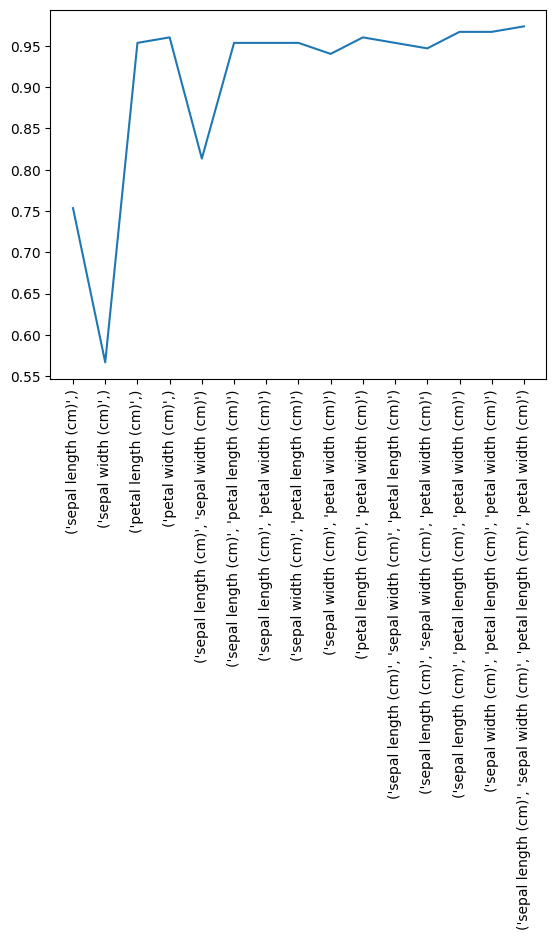

In [13]:
import matplotlib.pyplot as plt

plt.plot([str(k) for k in set['feature_names']],set['avg_score'])
plt.xticks(rotation=90)
plt.show()

## Linear Regression

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df['medv'],test_size=0.2,random_state=1)

print(X_train.shape,X_test.shape)

(404, 13) (102, 13)


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [17]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

linear_model = LinearRegression()

print('Training:',np.mean(cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')))
print('Testing:',np.mean(cross_val_score(linear_model, X_test, y_test, cv=5, scoring='r2')))

Training: 0.7025123301096212
Testing: 0.6514899901155402


- Heavy overfitting

In [18]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', print_progress=True, cv=5, n_jobs=-1)

sel = exh.fit(X_train, y_train)

Features: 8191/8191

In [19]:
sel.best_feature_names_

('0', '1', '4', '5', '7', '8', '9', '10', '11', '12')

In [20]:
sel.best_score_

np.float64(0.7100327839218561)

In [21]:
sel.get_metric_dict().head()

AttributeError: 'dict' object has no attribute 'head'

In [ ]:
metrics_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T

In [ ]:
metrics_df

In [ ]:
def adj_r2score(r2, num_examples, num_features):
    coef = (num_examples - 1)/(num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

In [ ]:
metrics_df['observations'] = 404
metrics_df['num_features'] = metrics_df['feature_idx'].apply(lambda x:len(x))
metrics_df['adj_r2score'] = adj_r2score(metrics_df['avg_score'], metrics_df['observations'], metrics_df['num_features'])

In [ ]:
metrics_df

In [ ]:
metrics_df.sort_values('adj_r2score',ascending=False)['feature_idx'].values[0]

In [ ]:
metrics_df.sort_values('avg_score',ascending=False)['feature_idx'].values[0]

In [ ]:
sel_X_train = sel.transform(X_train)
sel_X_test = sel.transform(X_test)

In [ ]:
lr2 = LinearRegression()

print("Training:",np.mean(cross_val_score(lr2, sel_X_train, y_train, cv=5, scoring='r2')))
print("Testing:",np.mean(cross_val_score(lr2, sel_X_test, y_test, cv=5, scoring='r2')))

## Sequential Backword Eliminasion

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print(X_train.shape)
print(X_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

lr = LinearRegression()

selx = SFS(lr, k_features='best', forward=False, floating=False, cv=5, n_jobs=-1)
selx.fit(X_train, y_train)

In [ ]:
selx.k_feature_idx_

In [ ]:
metrics = pd.DataFrame.from_dict(selx.get_metric_dict()).T
metrics['observations'] = 404
metrics['n_features'] = metrics['feature_idx'].apply(lambda x: len(x))
metrics['adj_r2score'] = adj_r2score(metrics['avg_score'],metrics['observations'],metrics['n_features'])

In [ ]:
metrics

In [ ]:
metrics.sort_values('adj_r2score',ascending=False)

## Sequential Forward Selector

In [ ]:
X = df.iloc[:,:-1]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print(X_train.shape)
print(X_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

lr = LinearRegression()

selx = SFS(lr, k_features='best', forward=True, floating=False, cv=5, n_jobs=-1)
selx.fit(X_train, y_train)

In [ ]:
selx.k_feature_idx_

In [ ]:
metrics = pd.DataFrame.from_dict(selx.get_metric_dict()).T
metrics['observations'] = 404
metrics['n_features'] = metrics['feature_idx'].apply(lambda x: len(x))
metrics['adj_r2score'] = adj_r2score(metrics['avg_score'],metrics['observations'],metrics['n_features'])

In [ ]:
metrics